![](./image/deep_learning.jpg)

# **Introduction to Deep Learning**

![](https://miro.medium.com/proxy/1*4wREvShuhT8kxxPFpKBd6A.jpeg)

### **Brief Content of this Notebook:**
>* Perceptron Learning Algorithm
* Multi-Layer Perceptron and Backpropagation
* Training an MLP with Tensorflow  
* Fine-Tuning Neural Network Hyperparameters

* **[Part 1: Perceptron Learning Algorithm](#Part-1:-Perceptron-Learning-Algorithm)**  


* **[Part 2: Multi-Layer Perceptron and Backpropagation](#Part-2:-Multi-Layer-Perceptron-and-Backpropagation)**  


* **[Part 3: Training an MLP with Tensorflow ](#Part-3:-Training-an-MLP-with-Tensorflow)**

# Part 1: Perceptron Learning Algorithm

In machine learning, the perceptron is an algorithm for supervised learning of binary classifiers. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. The Perceptron is one of the simplest artificial neural networks (ANNs) architectures.

Lets build the perceptron model with a simple classification problem.

![](https://miro.medium.com/max/684/0*RuUpWDXIqL_tWpvH.png)

A perceptron consists of one or more inputs, a processor, and a single output. The inputs and output are numbers and each input connection is associated with a weight. 

Say, we have the input and output data
* Input: 
>* x1 = Height of the person 
>* x2 = Weight of the person
* Output:
>* y = Gender(Male/Female)

![](https://miro.medium.com/max/753/1*p2PTL_NRQA93-RDdnAGdvg.png)

Our motive is to fit a decision boundary(a line) that separates all the male samples from the female samples. We’ll use the perceptron model that’ll find the equation of the decision boundary for us. All we have to do is feed the input and output data for the model to train.

![](https://miro.medium.com/max/753/1*kjQhQv0R2Iw9bixtywW5rQ.png)

The general equation of a straight line is $ax + by + c = 0$ or we can rephrase $w_0 + w_1x_1 + w_2x_2 = 0  \quad \quad (1)$

**Note:** 
1. If $P(x_P, y_P)$ lies on the line, $w_0 + w_1x_P + w_2x_P = 0$
2. If $Q(x_Q, y_Q)$ lies above the line, $w_0 + w_1x_Q + w_2x_Q > 0$
3. If $R(x_R, y_R)$ lies below the line, $w_0 + w_1x_R + w_2x_R < 0$

Using this intuition, we can classify any point by substituting its value in the line equation. If the resultant value is positive, the sample belongs to class Male $(Y = 1)$, if negative, the sample is a female sample $(Y = -1)$.

![](https://miro.medium.com/max/1001/1*3FFsnCSmKckphHshsRbH3Q.png)

On Plotting the above property discussed, we get a function called the Sign function. This is the activation function that we are going to use.

We can define equation $(1)$ as dot product of vectors $W$ and $X$ such as $X \dot W = 0 \quad (2)$

Vector $X$:
![](https://miro.medium.com/max/429/1*Dusv9RkqITs34wAMNaEnvg.png)

Vector $W$:
![](https://miro.medium.com/max/305/1*w75nZrDOt_AwqkHWxBimUw.png)

The model correctly classifies the sample $X$ if $Y * (X \dot W) > 0$. The sample is misclassified if $- Y * (X \dot W) > 0$. We define a cost function for misclassified sample $X_i$:

$$J(\mathbf{W}; \mathbf{X}_i; Y_i) = -Y_i\mathbf{W}\mathbf{X}_i$$

We'll use an optimization algorithm, called the Gradient Descent to minimizes the cost function by gradually updating the weight values.

Firstly, calculate the derivatives:

$$\nabla_{\mathbf{W}}J(\mathbf{W}; \mathbf{X}_i; Y_i) = -Y_i\mathbf{X}_i
$$

Update $W$:
$$\mathbf{W} = \mathbf{W} + \eta Y_i\mathbf{X}_i
$$
with $\eta$ is learning rate.


![](https://miro.medium.com/proxy/1*pPYFYOZ-8dja-kRrkmuGOQ.jpeg)

In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [105]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
data

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [106]:
data = data[:100]
data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1)
data = np.asmatrix(data, dtype = 'float64')

d:\documents\other\mci\scorecard\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


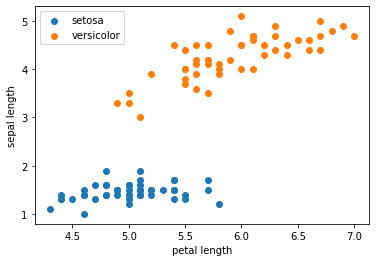

In [107]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker='o', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend()
plt.show()

In [112]:
class Perceptron:        
    def fit(self, features, labels, num_iter=10):
        self.weights = np.zeros(shape=(1, features.shape[1] + 1))
        self.misclassified_ = []
        
        for epoch in range(num_iter):
            misclassified = False
            for x, label in zip(features, labels):
                x = np.insert(x, 0, 1)
                y = np.dot(self.weights, x.transpose())
                
                target = 1.0 if (y > 0) else 0.0
                
                delta = label[0] - target
                
                if delta != 0:
                    misclassified += 1
                    self.weights += delta * x
            
            print('Epoch {}'.format(epoch))
            
            self.misclassified_.append(misclassified)
        
    def predict(self, features):
        new_features = np.concatenate([np.ones((len(features), 1)), features], axis=1)
        y_pred = new_features * self.weights.T
        print(y_pred)
        y_pred = np.asarray(y_pred.flatten())[0]
        print(y_pred)
        labels_pred = np.where(y_pred > 0, 1, 0)
        return labels_pred

In [113]:
features = data[:, :-1]
labels = data[:, -1]

num_iter = 10

model = Perceptron()
model.fit(features, labels, num_iter)
print('Done')

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Done


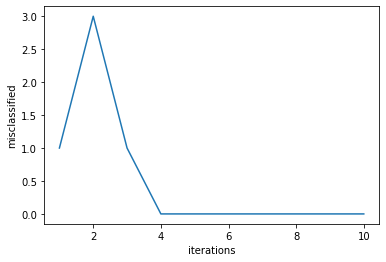

In [114]:
epochs = np.arange(1, num_iter+1)
plt.plot(epochs, model.misclassified_)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()

In [115]:
y_pred = model.predict(features)
y_pred

[[-11.49]
 [ -9.47]
 [-10.49]
 [ -8.98]
 [-11.74]
 [-11.26]
 [-10.36]
 [-10.5 ]
 [ -8.56]
 [ -9.53]
 [-12.02]
 [ -9.76]
 [ -9.58]
 [-10.59]
 [-15.1 ]
 [-14.43]
 [-13.34]
 [-11.27]
 [-11.45]
 [-11.83]
 [ -9.9 ]
 [-11.25]
 [-13.38]
 [ -8.55]
 [ -8.2 ]
 [ -8.54]
 [ -9.54]
 [-11.08]
 [-11.24]
 [ -8.93]
 [ -8.68]
 [-10.5 ]
 [-13.46]
 [-14.45]
 [ -9.53]
 [-11.34]
 [-12.45]
 [ -9.53]
 [ -9.44]
 [-10.61]
 [-11.68]
 [ -6.81]
 [-10.16]
 [ -9.46]
 [ -9.53]
 [ -9.14]
 [-11.53]
 [ -9.86]
 [-11.91]
 [-10.66]
 [  7.3 ]
 [  7.14]
 [  9.03]
 [  8.33]
 [  8.99]
 [  8.91]
 [  8.15]
 [  4.33]
 [  8.08]
 [  6.92]
 [  6.7 ]
 [  6.85]
 [  7.48]
 [  9.37]
 [  3.98]
 [  6.43]
 [  8.74]
 [  6.42]
 [ 10.96]
 [  6.54]
 [  9.91]
 [  5.87]
 [ 11.85]
 [  9.29]
 [  6.74]
 [  6.9 ]
 [  9.48]
 [ 10.57]
 [  8.66]
 [  3.77]
 [  6.49]
 [  5.75]
 [  5.82]
 [ 12.72]
 [  8.96]
 [  7.08]
 [  8.21]
 [  9.53]
 [  6.22]
 [  7.61]
 [  9.11]
 [  8.49]
 [  6.7 ]
 [  4.58]
 [  7.82]
 [  6.41]
 [  6.99]
 [  6.96]
 [  2.41]
 [  6.83]]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Part 2: Multi-Layer Perceptron and Backpropagation

The perceptron is very useful for classifying data sets that are linearly separable. They encounter serious limitations with data sets that do not conform to this pattern. 

![](https://images.deepai.org/glossary-terms/multilayer-perceptron-1878889.jpg)

The MultiLayer Perceptron (MLPs) breaks this restriction and classifies datasets which are not linearly separable.  They do this by using a more robust and complex architecture to learn regression and classification models for difficult datasets.

![](https://miro.medium.com/proxy/1*eloYEyFrblGHVZhU345PJw.jpeg)

Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers.

<img src="https://scikit-learn.org/stable/_images/multilayerperceptron_network.png" width="300"/> 

**Input or Visible Layers**

This layer accepts input features. It provides information from the outside world to the network, no computation is performed at this layer, nodes here just pass on the information(features) to the hidden layer.

**Hidden Layers**

Nodes of this layer are not exposed to the outer world, they are the part of the abstraction provided by any neural network. Hidden layer performs all sort of computation on the features entered through the input layer and transfer the result to the output layer.

**Output Layer**

The final hidden layer is called the output layer and it is responsible for outputting a value or vector of values that correspond to the format required for the problem. The choice of activation function in he output layer is strongly constrained by the type of problem that you are modeling. For example: 
>* A regression problem may have a single output neuron and the neuron may have no activation function.
>* A binary classification problem may have a single output neuron and use a sigmoid activation function to output a value between 0 and 1 to represent the probability of predicting a value for the class 1. This can be turned into a crisp class value by using a threshold of 0.5 and snap values less than the threshold to 0 otherwise to 1.

## Training the Model

There are basically three steps in the training of the model.
1. Forward pass
2. Calculate error or loss
3. Backward pass

**1. Forward pass**

In this step of training the model, we just pass the input to model and multiply with weights and add bias at every layer and find the calculated output of the model.
![](https://miro.medium.com/max/1225/1*9dByklf9ybdvVtHq6RrOgw.png)

**2. Loss Calculate**

When we pass the data instance(or one example) we will get some output from the model that is called Predicted output(pred_out) and we have the label with the data that is real output or expected output(Expect_out). Based upon these both we calculate the loss that we have to backpropagate(using Backpropagation algorithm). There is various Loss Function that we use based on our output and requirement.

**3. Backward Pass**

After calculating the loss, we backpropagate the loss and updates the weights of the model by using gradient. This is the main step in the training of the model. In this step, weights will adjust according to the gradient flow in that direction.

## Activation function

![](https://miro.medium.com/max/770/1*vGj29ZBD1kH1kDlGQspPxA.png)

The value of Y can be anything ranging from -inf to +inf. The neuron really doesn’t know the bounds of the value. We decided to add “activation functions” for this purpose. To check the Y value produced by a neuron and decide whether outside connections should consider this neuron as “fired” or not. Or rather let’s say — “activated” or not.

![](https://miro.medium.com/max/1225/1*p_hyqAtyI8pbt2kEl6siOQ.png)

## Backpropagation

[Backpropagation](https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=44s)

# Part 3: Training an MLP with Tensorflow 

![](https://github.com/smoreira/MultiLayerPerceptron/raw/master/imagem_mlp.png?raw=true)

1. Import and parse the dataset.
2. Select the type of model.
3. Train the model.
4. Evaluate the model's effectiveness.
5. Use the trained model to make predictions.

In [1]:
# configure imports
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

## 1. Import and parse the dataset.

In [4]:
# Get data from url
raw_data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv')
columns_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'labels']
raw_data.columns = columns_name
raw_data

,sepal_length,sepal_width,petal_length,petal_width,labels
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


Each label is associated with string name (for example, "setosa"), but machine learning typically relies on numeric values. The label numbers are mapped to a named representation, such as:

>* **0**: Iris setosa
>* **1**: Iris versicolor
>* **2**: Iris virginica

In [6]:
features = raw_data.iloc[:, :-1].values
features[:5]

array([[6.4, 2.8, 5.6, 2.2],
       [5. , 2.3, 3.3, 1. ],
       [4.9, 2.5, 4.5, 1.7],
       [4.9, 3.1, 1.5, 0.1],
       [5.7, 3.8, 1.7, 0.3]])

In [14]:
# create labels for model
labels = np.zeros((len(features), 3), dtype=np.int8)
for i in raw_data['labels'].index:
    labels[i][raw_data['labels'][i]] = 1

In [ ]:
labels.shape

In [20]:
x_train, x_test, y_train, y_test = train_test_split(features, raw_data['labels'], test_size=0.2)

## 2. Select the type of model.

![](https://www.tensorflow.org/images/custom_estimators/full_network.png)

In [37]:
inputs = keras.Input(shape=(4,))
dense = layers.Dense(10, activation="relu")
x = dense(inputs)
x = layers.Dense(10, activation="relu")(x)
outputs = layers.Dense(3)(x)

In [38]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [39]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=32, epochs=200)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/200
3/3 [==============================] - 0s 2ms/step - loss: 1.2448 - accuracy: 0.1458
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 1.1684 - accuracy: 0.2604
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 1.1124 - accuracy: 0.2708
Epoch 4/200
3/3 [==============================] - 0s 2ms/step - loss: 1.1040 - accuracy: 0.3229
Epoch 5/200
3/3 [==============================] - 0s 1ms/step - loss: 1.0670 - accuracy: 0.3229
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 1.0514 - accuracy: 0.3646
Epoch 7/200
3/3 [==============================] - 0s 4ms/step - loss: 1.0391 - accuracy: 0.3229
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 1.0185 - accuracy: 0.3854
Epoch 9/200
3/3 [==============================] - 0s 1ms/step - loss: 0.9957 - accuracy: 0.3333
Epoch 10/200
3/3 [==============================] - 0s 2ms/step - loss: 0.9963 - accuracy: 0.3333
Epoch 11/200
3/3 [===========

In [25]:
test_data = pd.read_csv("https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")
test_data

,30,4,setosa,versicolor,virginica
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1
5,6.2,2.9,4.3,1.3,1
6,5.5,4.2,1.4,0.2,0
7,6.3,2.8,5.1,1.5,2
8,5.6,3.0,4.1,1.3,1
9,6.7,2.5,5.8,1.8,2


In [26]:
data_test = test_data.iloc[:, :-1].values
labels_test = test_data.iloc[:, -1].values

In [41]:
model.evaluate(data_test, labels_test)

1/1 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9667


[0.17987222969532013, 0.9666666388511658]

In [54]:
raw_data['labels'][2] = None
raw_data['labels']

0      1.0
1      1.0
2      NaN
3      1.0
4      1.0
      ... 
115    1.0
116    1.0
117    1.0
118    1.0
119    1.0
Name: labels, Length: 120, dtype: float64

In [59]:
raw_data['labels'].fillna(raw_data['labels'].mean(), inplace=True)
raw_data['labels'].dtype

dtype('float64')

In [ ]:
for column in data.columns:
    if ? != ?:
        data[column].?(?, inplace=True)